# Importing Required Libraries

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

# Reading Data Frame

In [277]:
df=pd.read_csv("dataframe_.csv")

In [278]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


# Finding and removing the null values

In [279]:
df.isna().sum()

input     1
output    1
dtype: int64

In [280]:
df.dropna(inplace=True)

# Removing Duplicates to prevent Data Leakage

In [281]:
df.duplicated().sum()

606

In [282]:
df.drop_duplicates(inplace=True)

# Outliers Finding using box plot

In [283]:
num=["input","output"]

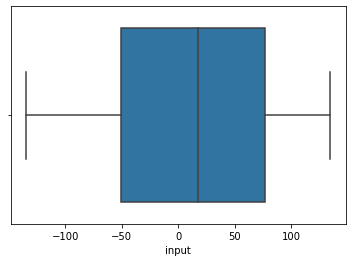

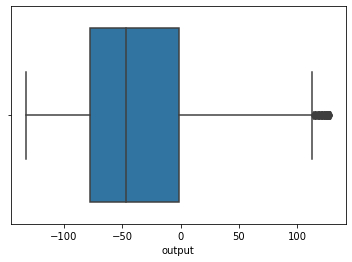

In [284]:
def out(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    ub = q3+(1.5*IQR)
    outliers = df[(df[col]<lb)|(df[col]>ub)].index
    return outliers
for i in num:
    df.drop(out(i),inplace=True)
    sns.boxplot(df[i])
    plt.show()

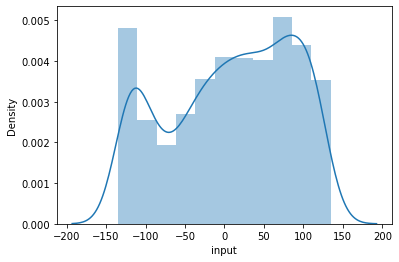

In [310]:
sns.distplot(df["input"]);

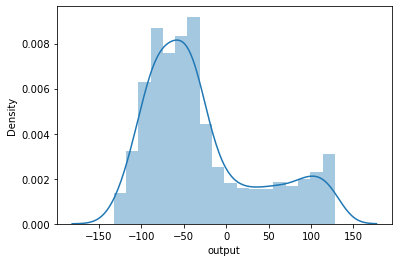

In [312]:
sns.distplot(df["output"]);

# Obersvations:
- If we remove the outliers is causes the scaling problem

# Defining the input(X) and output(y) varaibles

In [285]:
X=df[["input"]]
y=df[["output"]]

# Step 1 : Splitting the data into Train and test

In [296]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Step 2 : Rescaling the Data 

In [297]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Step 3: Fitting and Transforming  the Data

In [306]:
# fit_tranfroming the data
X_train_trans=scaler.fit_transform(X_train)
X_test_trans=scaler.transform(X_test)

# Step 4,5 & 6 : building,predicting and evaluation of model 

# LinearRegression

In [299]:
# building the model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
# prediction
y_test_pred=reg.predict(X_test)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

44.52389299688643

# DecisionTreeRegressor

In [300]:
# building the model
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
# prediction
y_test_pred=reg.predict(X_test)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

31.081662809185875

# Support Vector Regressor

In [301]:
# building the model
from sklearn.svm import SVR
reg=SVR()
reg.fit(X_train,y_train)
# prediction
y_test_pred=reg.predict(X_test)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

26.681016831147584

# KNeighborsRegressor

In [302]:
# building the model
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor()
reg.fit(X_train,y_train)
# prediction
y_test_pred=reg.predict(X_test)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

24.565434037505582

# RandomForestRegressor

In [303]:
# building the model
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
# prediction
y_test_pred=reg.predict(X_test)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

27.356997563497117

# AdaBoostRegressor

In [304]:
# building the model
from sklearn.ensemble import AdaBoostRegressor
reg=AdaBoostRegressor()
reg.fit(X_train,y_train)
# prediction
y_test_pred=reg.predict(X_test)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

27.566128624024937

# GradientBoostingRegressor

In [305]:
# building the model
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor()
reg.fit(X_train,y_train)
# prediction
y_test_pred=reg.predict(X_test)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

23.855854429862678

# Conclusion

- From above the results we say that Gradient Boosting Regressor is the best fit model to predict the output with less mean_absolute_error when compared to other models.